In [1]:
import numpy as np
import pickle

In [2]:
with open('choicesRBFKernel.pickle', 'rb') as f:
    allChoices = pickle.load(f)

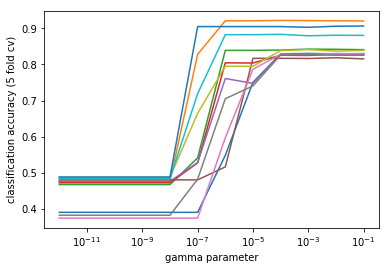

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
scale = scale[:12]
for choices in allChoices:
    (gamma,regscale,scores) = choices
    ax.plot(scale,np.max(scores,1))
ax.set_xscale("log")
ax.set_xlabel('gamma parameter')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.show()
fig.savefig('gamma_para.pdf')

In [4]:
# After a threshold value, similar performance is achievable for different choice of regscale.
# Threshold value varies only by atmost a single step.
# Above results using 10 points on a scale between mu values to be estimated.

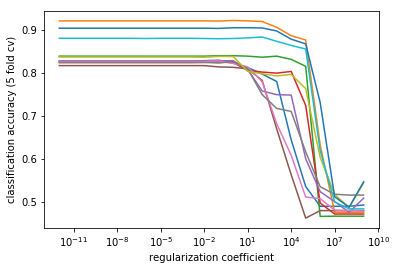

In [7]:
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
for choices in allChoices:
    (gamma,regscale,scores) = choices
    ax.plot(scale[:-3],scores[8][:-3])
ax.set_xscale("log")
ax.set_xlabel('regularization coefficient')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.show()
fig.savefig('reg_coeff.pdf')

In [8]:
#Also means if you want a faster estimation and a dont mind being slightly less precise, you can do a one time calculation and use fixed classifier parameters.
# In that case, only run kernel classification the number of points that are being estimated.

In [9]:
#I have for my experiments used made a one time selection of lernel parameter values and narrow regscale bounds using typical mu value,
#and made a choice of 20 regularizers for each classification, on the narrow regscale. - Using a single validation set.